In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data= pd.read_excel('/content/ANZ synthesised transaction dataset.xlsx')

In [ ]:
data.sample(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
938,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,3287.56,2018-08-08,F,23,NaN,NaN,2018-08-08T12:00:00.000+0000,1626.48,3f88ba70530247e6a8489f627e7f7462,Australia,CUS-2500783281,NaN,credit
8845,authorized,1.0,NaN,ACC-3879258709,AUD,143.83 -37.66,SALES-POS,b0299acf-7955-4b74-b24b-05fe5c2f65f8,NaN,Natasha,202270.07,2018-10-07,F,40,Craigieburn,VIC,2018-10-07T12:31:41.000+0000,30.85,fbfb939ec36a42ae8690922841af999e,Australia,CUS-527400765,144.94 -37.6,debit
6877,authorized,0.0,NaN,ACC-2890243754,AUD,153.32 -27.93,POS,98be2e04-ead8-4457-9f0a-18a63ec28153,NaN,Joseph,4534.67,2018-09-22,M,37,Highgate Hill,QLD,2018-09-22T21:13:19.000+0000,9.75,0c6549ed5e14416ba28671004a5bad19,Australia,CUS-2695611575,153.02 -27.49,debit
6235,posted,NaN,0,ACC-37709441,AUD,153.41 -28.01,PAY/SALARY,NaN,0.0,Charles,14022.13,2018-09-18,M,18,NaN,NaN,2018-09-18T11:00:00.000+0000,4132.23,239a5365c2e14136a4f482ed70323356,Australia,CUS-3336454548,NaN,credit
10625,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,POS,4e77a162-b3b9-411e-b3c9-955b93fb9fda,NaN,Jeffrey,4059.94,2018-10-20,M,30,Victoria Point,QLD,2018-10-20T21:27:44.000+0000,8.69,80ed96393fe44c499b4b7f25f4b6f608,Australia,CUS-860700529,153.28 -27.59,debit


In [ ]:
#relevant feature selection
data_feature= data[['customer_id', 'age', 'txn_description','balance','gender', 'amount']]

# one hot encoding for gender( 1= male, 0= female)
customer_data = pd.get_dummies(data_feature, columns = ['gender'], drop_first = True)

customer_data.head()

,customer_id,age,txn_description,balance,amount,gender_M
0,CUS-2487424745,26,POS,35.39,16.25,0
1,CUS-2487424745,26,SALES-POS,21.20,14.19,0
2,CUS-2142601169,38,POS,5.71,6.42,1
3,CUS-1614226872,40,SALES-POS,2117.22,40.90,0
4,CUS-2487424745,26,SALES-POS,17.95,3.25,0


In [ ]:
print(customer_data['txn_description'].value_counts())

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


In [ ]:
data_1= customer_data.groupby('customer_id').mean().reset_index()
data_1

,customer_id,age,balance,amount,gender_M
0,CUS-1005756958,53,2275.852055,222.862603,0
1,CUS-1117979751,21,9829.929000,339.843700,1
2,CUS-1140341822,28,5699.212250,212.632500,1
3,CUS-1147642491,34,9032.841186,245.600169,0
4,CUS-1196156254,34,22272.433755,147.145796,0
...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276,0
96,CUS-809013380,21,3756.902903,151.694274,0
97,CUS-860700529,30,3462.276009,77.681888,1
98,CUS-880898248,26,8528.830385,146.954487,1


In [ ]:
# The average salary of each customer
data_salary = customer_data.loc[data_feature['txn_description'] == 'PAY/SALARY'].groupby('customer_id').agg({'amount': [('Average_salary','mean')]})
data_salary.columns = data_salary.columns.droplevel()
data_salary = data_salary.reset_index()



In [ ]:
data_salary

,customer_id,Average_salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73
...,...,...
95,CUS-72755508,725.32
96,CUS-809013380,1037.07
97,CUS-860700529,1808.62
98,CUS-880898248,1433.98


In [ ]:
data_final= pd.merge(data_1, data_salary, on='customer_id')
data_final

,customer_id,age,balance,amount,gender_M,Average_salary
0,CUS-1005756958,53,2275.852055,222.862603,0,970.47
1,CUS-1117979751,21,9829.929000,339.843700,1,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,0,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,0,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276,0,725.32
96,CUS-809013380,21,3756.902903,151.694274,0,1037.07
97,CUS-860700529,30,3462.276009,77.681888,1,1808.62
98,CUS-880898248,26,8528.830385,146.954487,1,1433.98


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


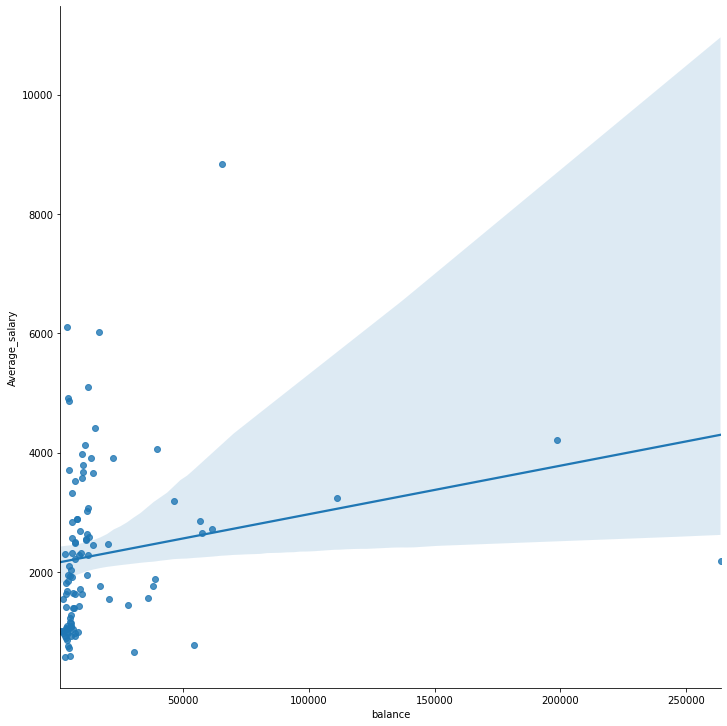

In [ ]:
sns.lmplot('balance','Average_salary', data=data_final, height= 10)

In [ ]:
data_final.corr()

,age,balance,amount,gender_M,Average_salary
age,1.000000,0.231963,0.175525,0.012067,-0.135264
balance,0.231963,1.000000,0.272791,0.134158,0.205646
amount,0.175525,0.272791,1.000000,0.151430,0.289481
gender_M,0.012067,0.134158,0.151430,1.000000,0.154113
Average_salary,-0.135264,0.205646,0.289481,0.154113,1.000000


In [ ]:
train,test= train_test_split(data_final, test_size= 0.2)
X= train[['age', 'balance' ,	'amount', 	'gender_M']] 	
y= train['Average_salary']
X_test= test[['age', 'balance' ,	'amount', 	'gender_M']] 
y_test= test['Average_salary'] 

## **Linear Regression**

In [ ]:
lm= LinearRegression()

lm.fit(X,y)

lm.score(X,y)

0.1728754770493245

In [ ]:
y_predict= lm.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

1803.947235971429


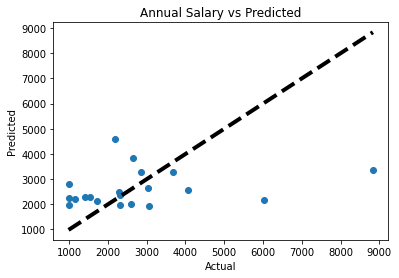

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

Clearly, the predicted salaries are not in line with the regression line. The prediction is not accurate as majority of the data points are missing and dataset is very less (100 unique customers)

In [ ]:
predict= pd.DataFrame(y_predict)
predict

,0
0,2808.303837
1,3840.634619
2,4607.771996
3,1957.429317
4,2255.120407
5,3290.065562
6,2365.809919
7,2309.709289
8,2304.782188
9,2114.478279
